In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, average_precision_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.svm import SVC
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
df = pd.read_csv('osteoporosis.csv')

df.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

In [4]:
df.nunique()

Id                     1749
Age                      73
Gender                    2
Hormonal Changes          2
Family History            2
Race/Ethnicity            3
Body Weight               2
Calcium Intake            2
Vitamin D Intake          2
Physical Activity         2
Smoking                   2
Alcohol Consumption       1
Medical Conditions        2
Medications               1
Prior Fractures           2
Osteoporosis              2
dtype: int64

In [5]:
df.isnull().sum()

Id                       0
Age                      0
Gender                   0
Hormonal Changes         0
Family History           0
Race/Ethnicity           0
Body Weight              0
Calcium Intake           0
Vitamin D Intake         0
Physical Activity        0
Smoking                  0
Alcohol Consumption    988
Medical Conditions     647
Medications            985
Prior Fractures          0
Osteoporosis             0
dtype: int64

In [6]:
df[(df['Alcohol Consumption']).isnull()]

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1
6,107447,20,Male,Postmenopausal,Yes,African American,Underweight,Adequate,Sufficient,Sedentary,No,NaN,Rheumatoid Arthritis,NaN,No,1
7,103065,39,Male,Postmenopausal,Yes,Asian,Normal,Adequate,Sufficient,Sedentary,No,NaN,Rheumatoid Arthritis,Corticosteroids,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951,109591,22,Female,Normal,No,Asian,Normal,Adequate,Sufficient,Active,Yes,NaN,NaN,Corticosteroids,No,0
1954,106463,23,Female,Postmenopausal,Yes,Caucasian,Underweight,Low,Insufficient,Active,No,NaN,NaN,Corticosteroids,No,0
1955,103142,34,Female,Postmenopausal,No,African American,Underweight,Low,Sufficient,Sedentary,No,NaN,Hyperthyroidism,NaN,No,0
1956,105187,25,Male,Postmenopausal,No,African American,Normal,Low,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,Yes,0


In [7]:
df[(df['Medical Conditions'].isnull())]

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
9,105960,19,Female,Normal,No,African American,Normal,Low,Sufficient,Active,Yes,Moderate,NaN,Corticosteroids,Yes,1
10,101592,47,Female,Postmenopausal,Yes,Asian,Normal,Low,Sufficient,Active,Yes,NaN,NaN,NaN,Yes,1
12,102439,19,Female,Postmenopausal,Yes,Asian,Underweight,Low,Insufficient,Active,Yes,NaN,NaN,Corticosteroids,Yes,1
18,104601,39,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Insufficient,Sedentary,No,Moderate,NaN,NaN,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944,108179,21,Male,Postmenopausal,No,African American,Normal,Adequate,Insufficient,Active,No,Moderate,NaN,Corticosteroids,No,0
1948,103498,25,Male,Postmenopausal,No,Asian,Normal,Adequate,Insufficient,Sedentary,Yes,Moderate,NaN,NaN,Yes,0
1950,105044,35,Female,Postmenopausal,Yes,Caucasian,Normal,Low,Sufficient,Active,Yes,NaN,NaN,NaN,Yes,0
1951,109591,22,Female,Normal,No,Asian,Normal,Adequate,Sufficient,Active,Yes,NaN,NaN,Corticosteroids,No,0


In [8]:
df[(df['Medications'].isnull())]

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1
6,107447,20,Male,Postmenopausal,Yes,African American,Underweight,Adequate,Sufficient,Sedentary,No,NaN,Rheumatoid Arthritis,NaN,No,1
10,101592,47,Female,Postmenopausal,Yes,Asian,Normal,Low,Sufficient,Active,Yes,NaN,NaN,NaN,Yes,1
14,105371,77,Male,Normal,Yes,African American,Underweight,Low,Sufficient,Sedentary,Yes,NaN,Hyperthyroidism,NaN,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,109343,19,Female,Normal,Yes,Asian,Normal,Adequate,Sufficient,Active,Yes,NaN,Hyperthyroidism,NaN,No,0
1948,103498,25,Male,Postmenopausal,No,Asian,Normal,Adequate,Insufficient,Sedentary,Yes,Moderate,NaN,NaN,Yes,0
1950,105044,35,Female,Postmenopausal,Yes,Caucasian,Normal,Low,Sufficient,Active,Yes,NaN,NaN,NaN,Yes,0
1953,106130,19,Female,Normal,Yes,African American,Normal,Adequate,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,NaN,Yes,0


In [9]:
df['Alcohol Consumption'].value_counts()

Alcohol Consumption
Moderate    970
Name: count, dtype: int64

In [10]:
df['Medical Conditions'].value_counts()

Medical Conditions
Hyperthyroidism         678
Rheumatoid Arthritis    633
Name: count, dtype: int64

In [11]:
df['Medications'].value_counts()

Medications
Corticosteroids    973
Name: count, dtype: int64

In [12]:
df['Alcohol Consumption'].fillna('Not Moderate', inplace=True)
df['Medical Conditions'].fillna('Neither', inplace = True)
df['Medications'].fillna('Not Corticosteroids', inplace = True)

In [13]:
df

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,Not Moderate,Neither,Not Corticosteroids,Yes,1
2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,Not Moderate,Rheumatoid Arthritis,Corticosteroids,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,Not Moderate,Rheumatoid Arthritis,Not Corticosteroids,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,106130,19,Female,Normal,Yes,African American,Normal,Adequate,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Not Corticosteroids,Yes,0
1954,106463,23,Female,Postmenopausal,Yes,Caucasian,Underweight,Low,Insufficient,Active,No,Not Moderate,Neither,Corticosteroids,No,0
1955,103142,34,Female,Postmenopausal,No,African American,Underweight,Low,Sufficient,Sedentary,No,Not Moderate,Hyperthyroidism,Not Corticosteroids,No,0
1956,105187,25,Male,Postmenopausal,No,African American,Normal,Low,Insufficient,Sedentary,Yes,Not Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,0


Gender
Male      992
Female    966
Name: count, dtype: int64


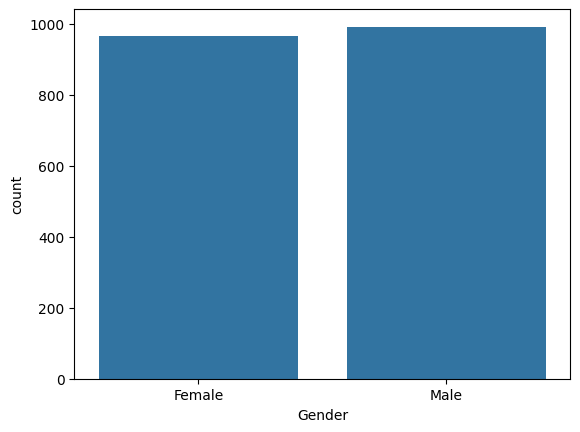

Hormonal Changes
Normal            981
Postmenopausal    977
Name: count, dtype: int64


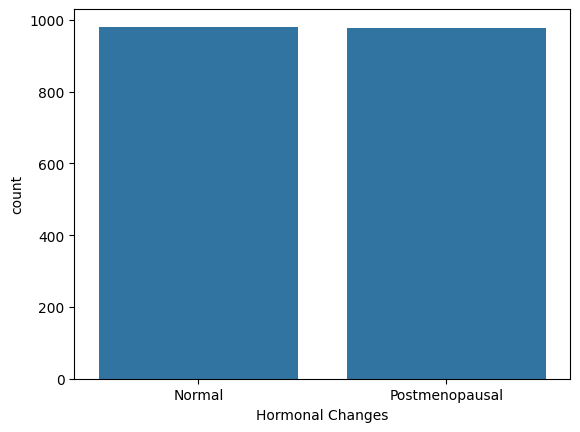

Family History
No     998
Yes    960
Name: count, dtype: int64


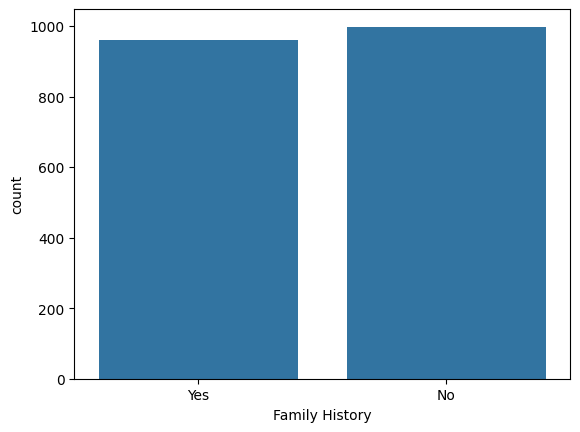

Race/Ethnicity
African American    681
Caucasian           646
Asian               631
Name: count, dtype: int64


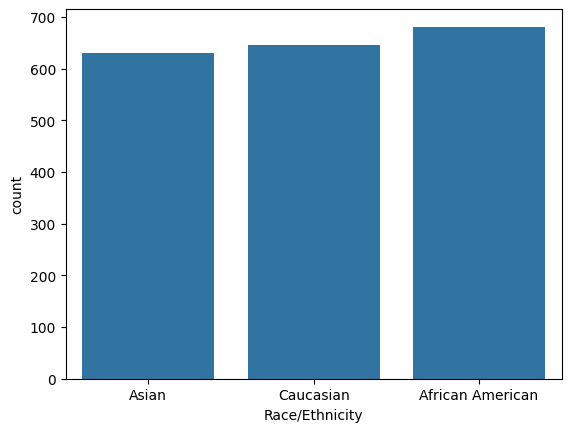

Body Weight
Normal         1027
Underweight     931
Name: count, dtype: int64


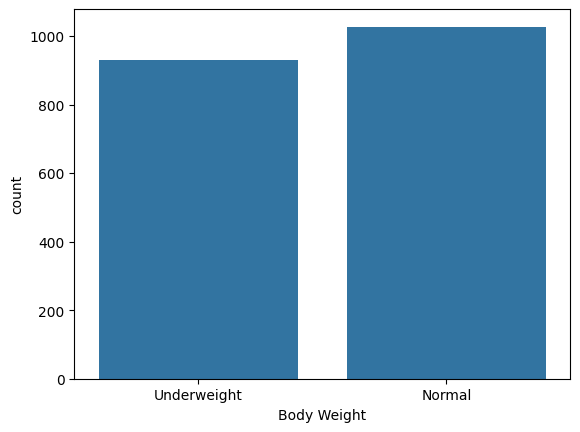

Calcium Intake
Low         1004
Adequate     954
Name: count, dtype: int64


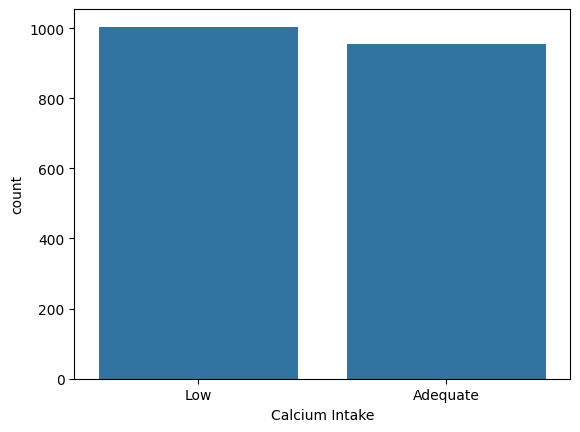

Vitamin D Intake
Sufficient      1011
Insufficient     947
Name: count, dtype: int64


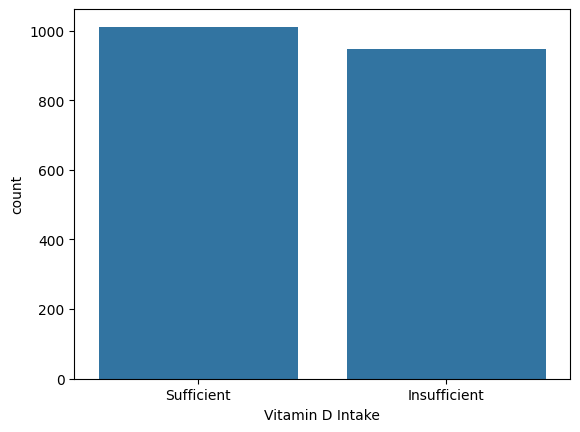

Physical Activity
Active       1021
Sedentary     937
Name: count, dtype: int64


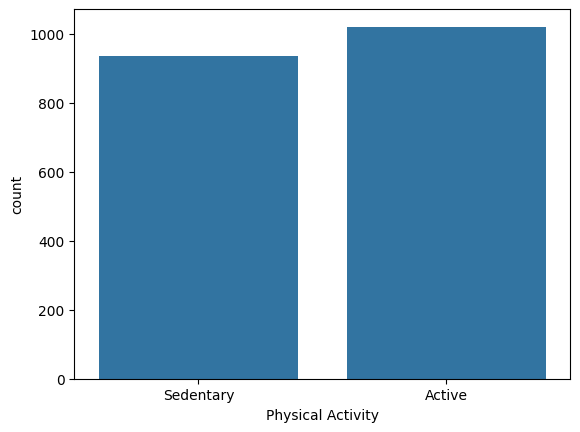

Smoking
Yes    982
No     976
Name: count, dtype: int64


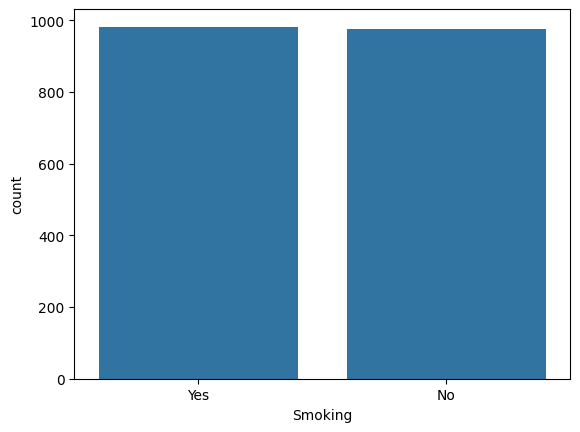

Alcohol Consumption
Not Moderate    988
Moderate        970
Name: count, dtype: int64


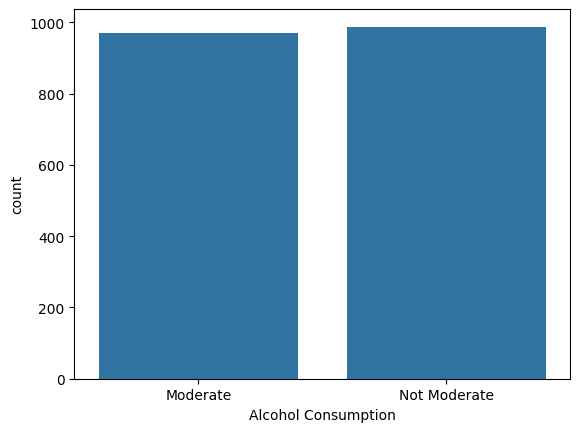

Medical Conditions
Hyperthyroidism         678
Neither                 647
Rheumatoid Arthritis    633
Name: count, dtype: int64


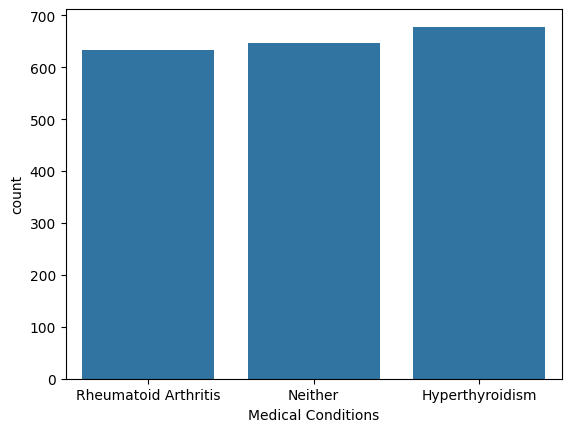

Medications
Not Corticosteroids    985
Corticosteroids        973
Name: count, dtype: int64


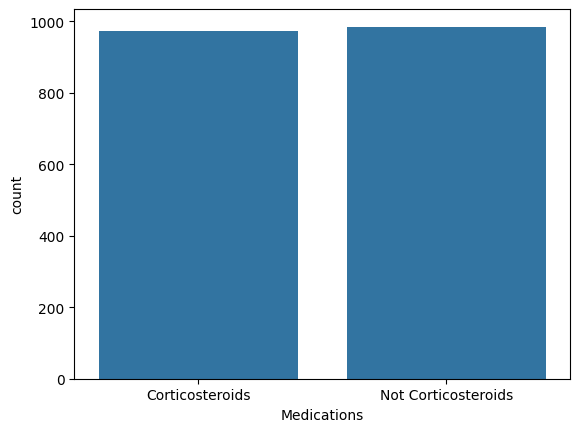

Prior Fractures
Yes    983
No     975
Name: count, dtype: int64


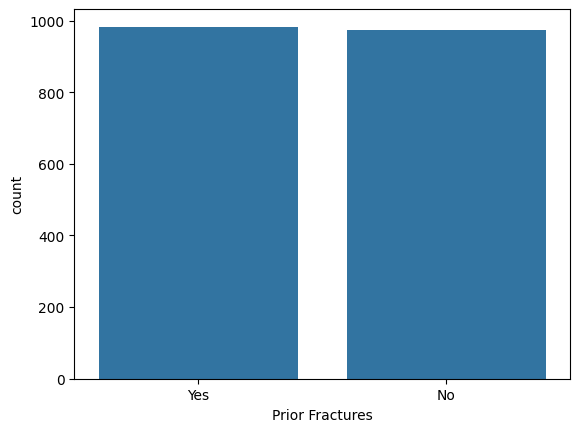

Osteoporosis
1    979
0    979
Name: count, dtype: int64


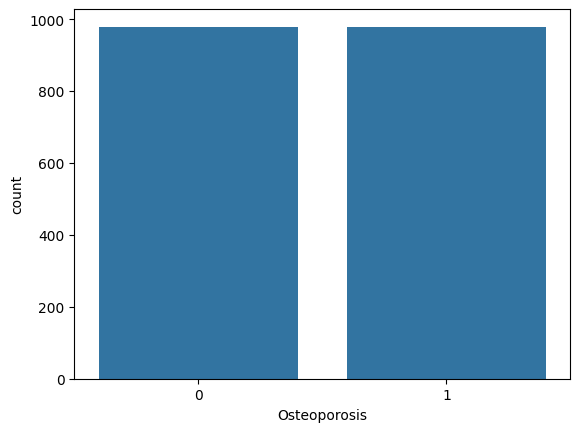

In [14]:
categorical_features =  df.iloc[:, 2:].columns.to_list()

for category in categorical_features:
    print(df[category].value_counts())
    sns.countplot(data = df, x = category)
    plt.show()

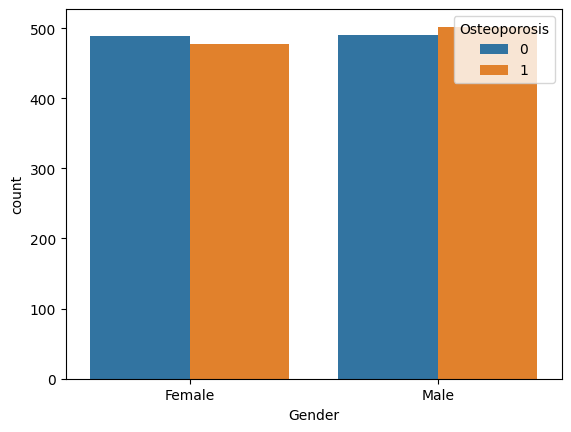

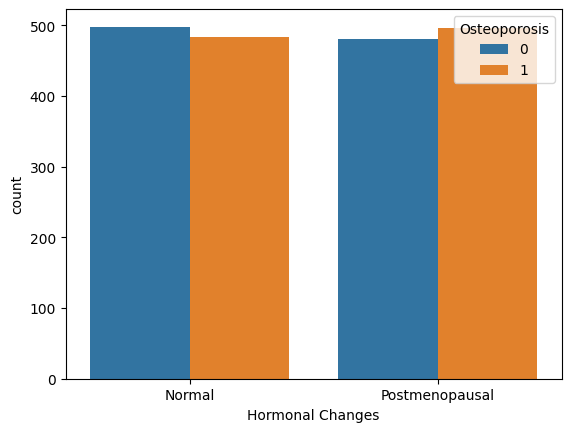

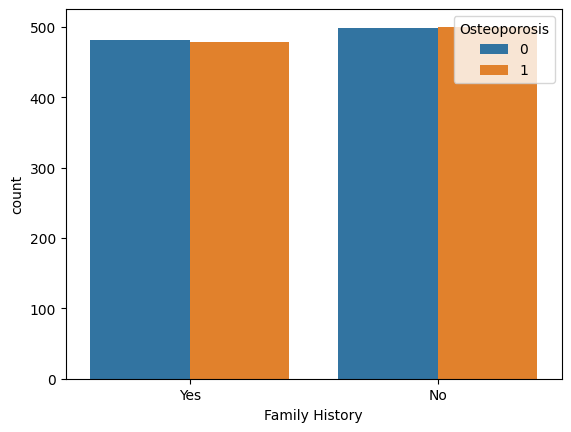

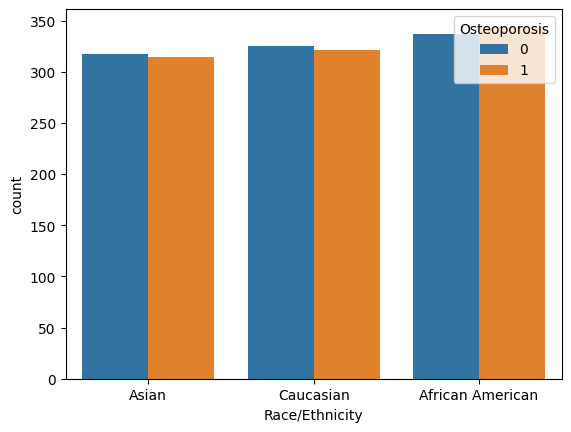

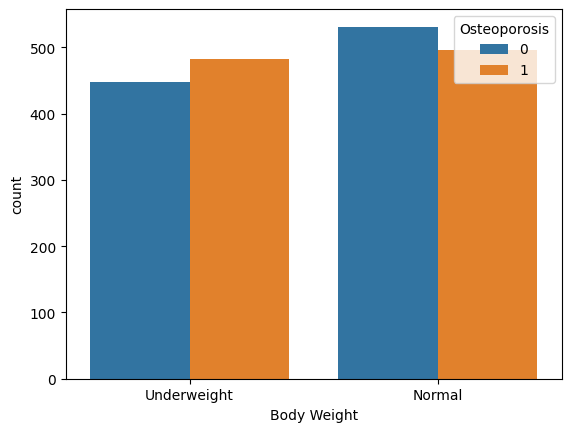

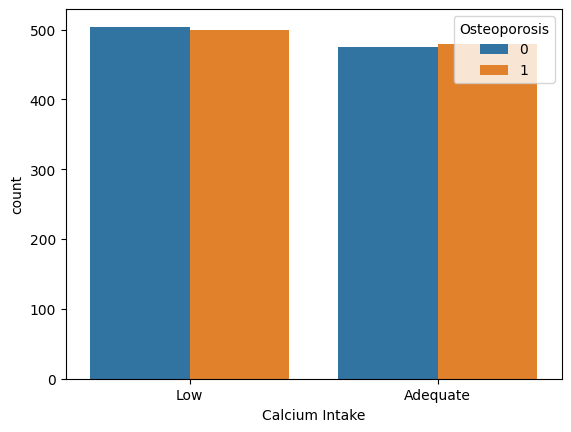

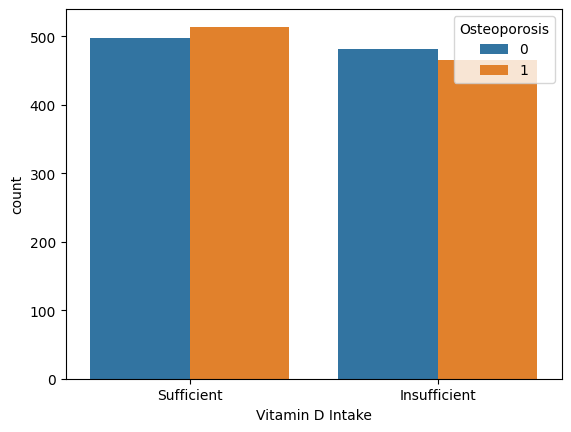

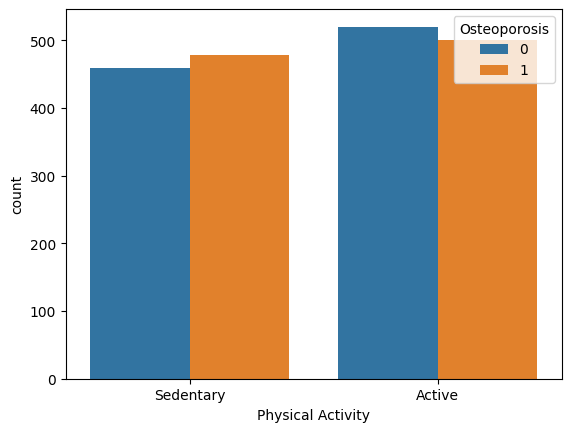

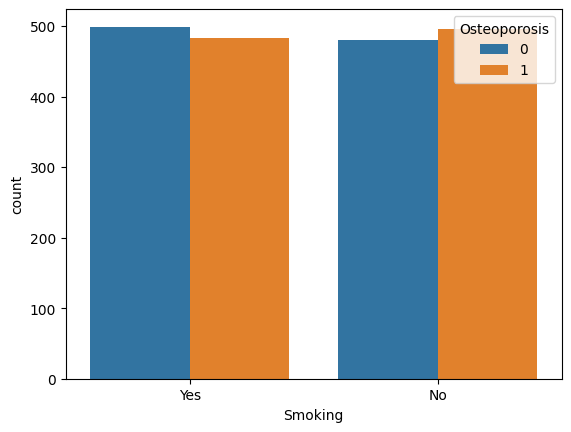

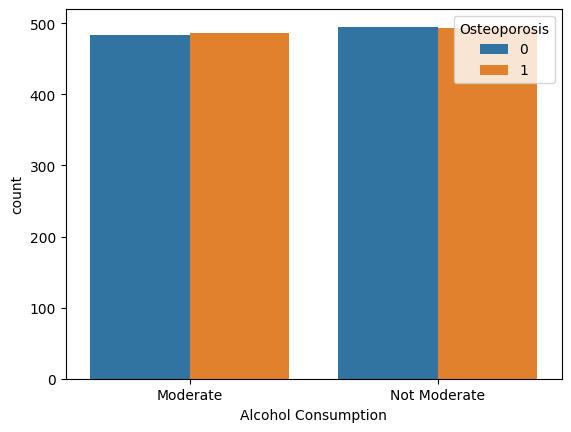

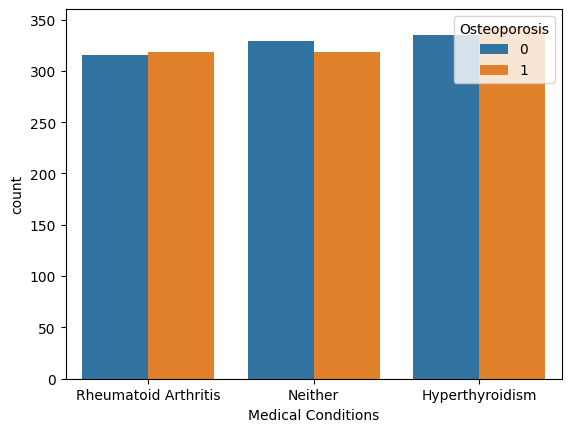

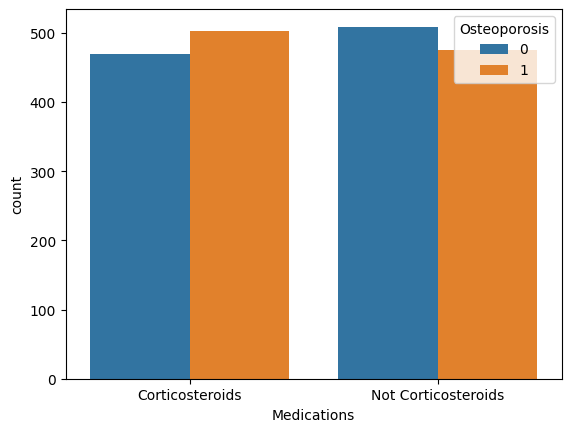

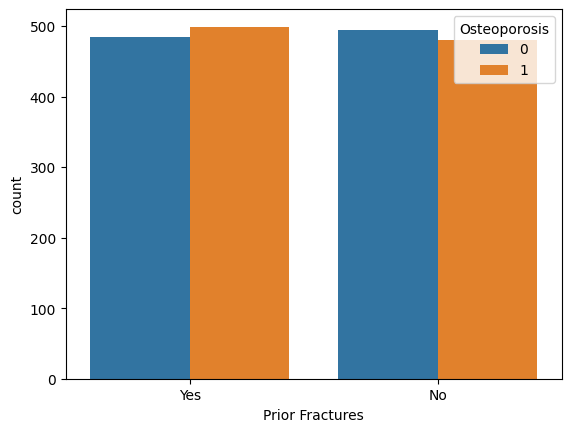

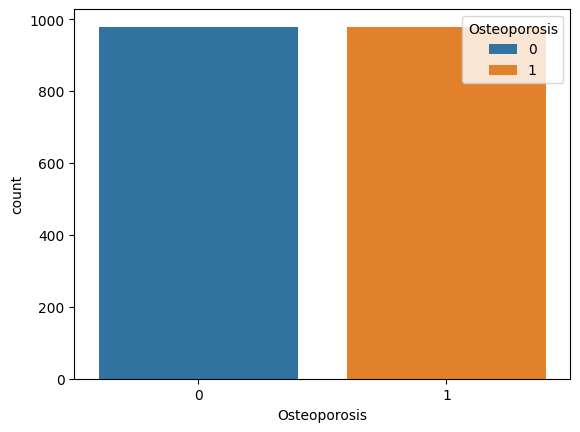

In [15]:
for category in categorical_features:
     sns.countplot(data = df , x = category, hue= 'Osteoporosis')
     plt.show()

<Axes: xlabel='Age', ylabel='Count'>

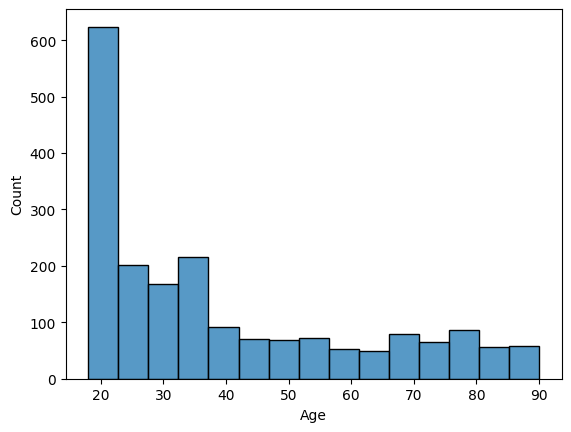

In [16]:
sns.histplot(df, x = 'Age')

In [17]:
df['Osteoporosis']

0       1
1       1
2       1
3       1
4       1
       ..
1953    0
1954    0
1955    0
1956    0
1957    0
Name: Osteoporosis, Length: 1958, dtype: int64

Osteoporosis
0    24.343207
1    53.859040
Name: Age, dtype: float64


<Axes: xlabel='Osteoporosis', ylabel='Age'>

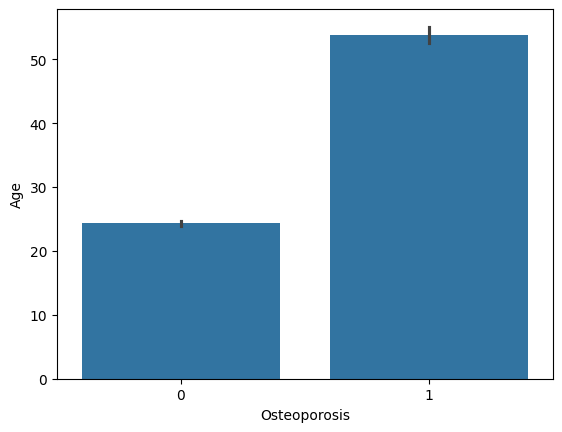

In [18]:
print(df.groupby('Osteoporosis')['Age'].mean())
sns.barplot(df, x = 'Osteoporosis', y = 'Age')

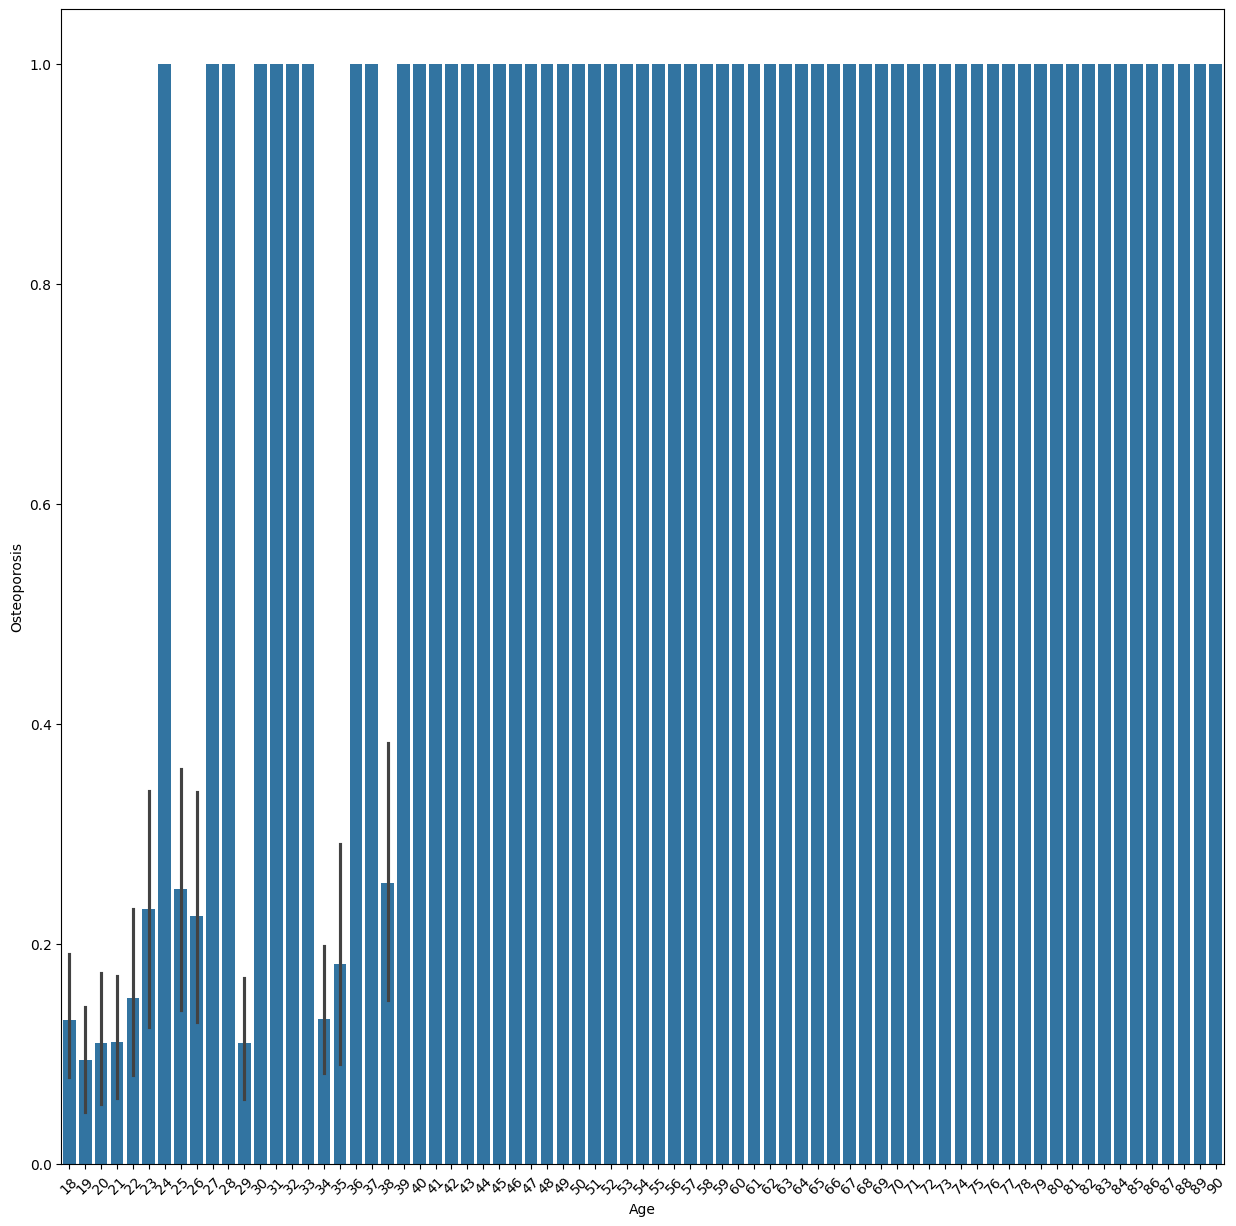

In [19]:
plt.figure(figsize=(15,15))
sns.barplot(df, x = 'Age', y = 'Osteoporosis')
plt.xticks(rotation = 45)
plt.show()

In [20]:
categorical_features_x = df.iloc[:, 2:-1].columns.to_list()

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

for category_x in categorical_features_x:
    df[category_x] = lb.fit_transform(df[category_x])

In [21]:
df

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,104866,69,0,0,1,1,1,1,1,1,1,0,2,0,1,1
1,101999,32,0,0,1,1,1,1,1,1,0,1,1,1,1,1
2,106567,89,0,1,0,2,0,0,1,0,0,0,0,0,0,1
3,102316,78,0,0,0,2,1,0,0,1,1,1,2,0,0,1
4,101944,38,1,1,1,0,0,1,1,0,1,1,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,106130,19,0,0,1,0,0,0,1,1,1,0,2,1,1,0
1954,106463,23,0,1,1,2,1,1,0,0,0,1,1,0,0,0
1955,103142,34,0,1,0,0,1,1,1,1,0,1,0,1,0,0
1956,105187,25,1,1,0,0,0,1,0,1,1,1,2,0,1,0


In [22]:
df.drop('Id', axis = 1, inplace=True)


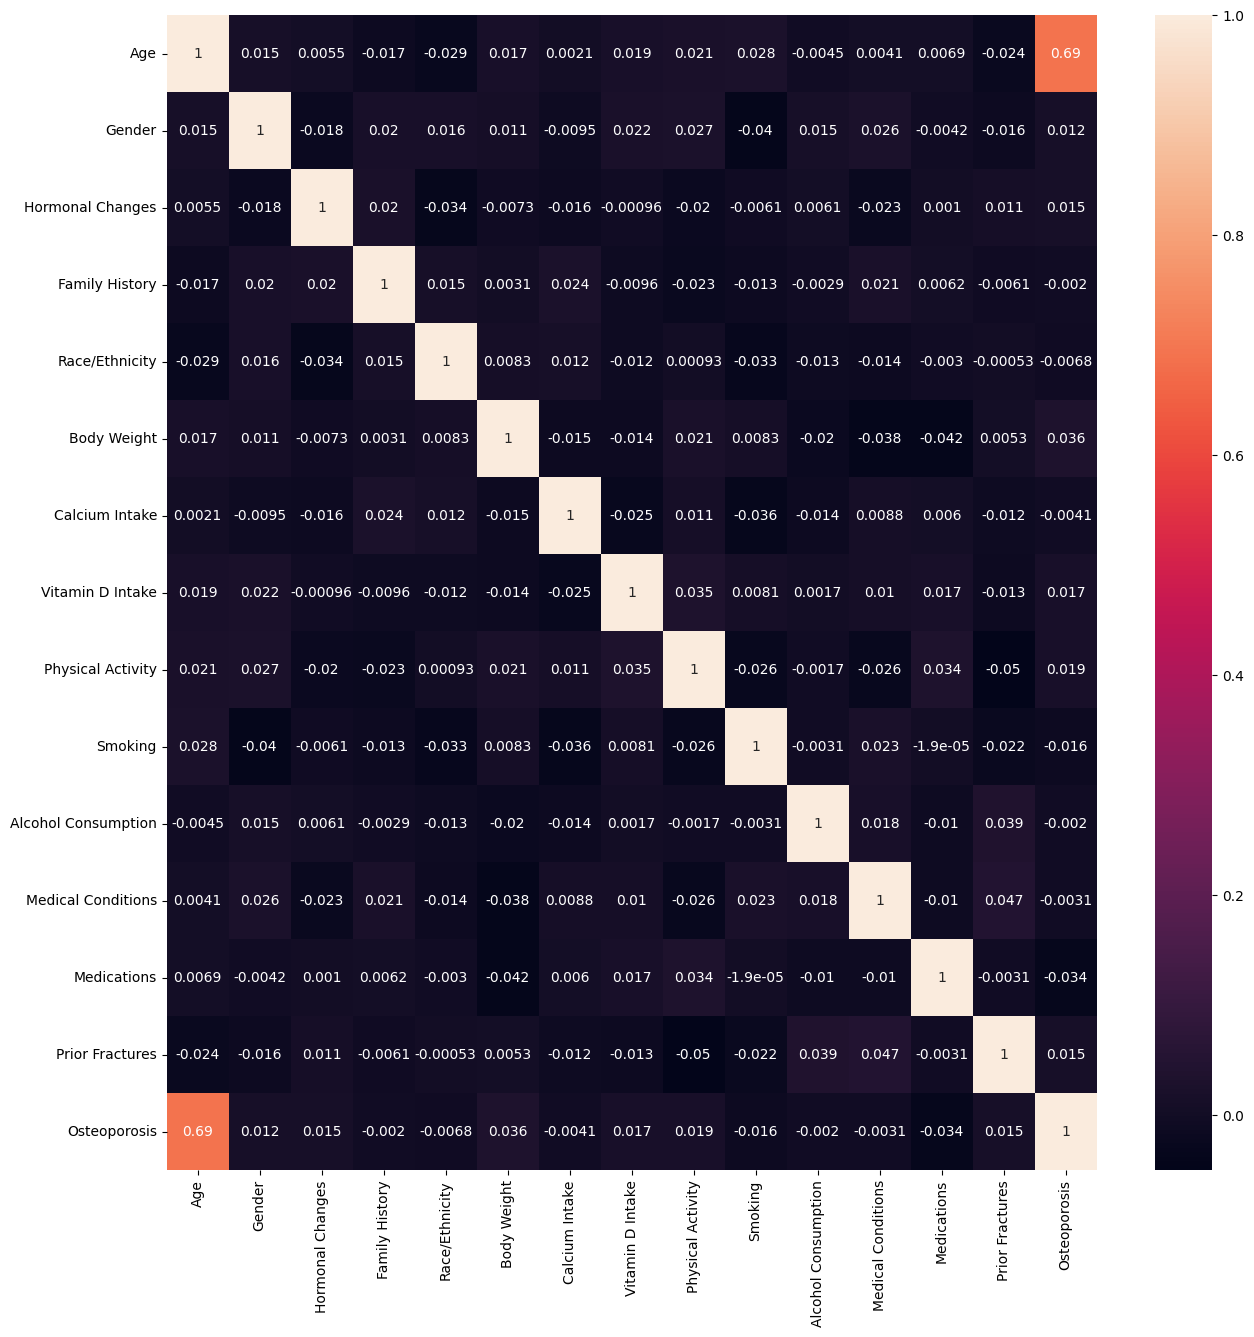

In [23]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [24]:
df.var()

Age                    456.054153
Gender                   0.250084
Hormonal Changes         0.250127
Family History           0.250034
Race/Ethnicity           0.677759
Body Weight              0.249526
Calcium Intake           0.249965
Vitamin D Intake         0.249861
Physical Activity        0.249667
Smoking                  0.250125
Alcohol Consumption      0.250107
Medical Conditions       0.669374
Medications              0.250118
Prior Fractures          0.250124
Osteoporosis             0.250128
dtype: float64

In [25]:
df.describe()

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
count,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000,1958.000000
mean,39.101124,0.506639,0.498979,0.490296,0.982125,0.475485,0.512768,0.516343,0.478550,0.501532,0.504597,0.977017,0.503064,0.502043,0.500000
std,21.355424,0.500084,0.500127,0.500034,0.823261,0.499526,0.499965,0.499860,0.499667,0.500125,0.500107,0.818153,0.500118,0.500124,0.500128
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,32.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000
75%,53.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000


In [26]:
from sklearn.preprocessing import OneHotEncoder

x = df.drop('Osteoporosis', axis = 1)
y = df['Osteoporosis'].values

x_age = x['Age'].values

onehot = OneHotEncoder(sparse_output=False)

one_hot_x = onehot.fit_transform(x.drop('Age', axis = 1))

print(one_hot_x)


[[1. 0. 1. ... 0. 0. 1.]
 [1. 0. 1. ... 1. 0. 1.]
 [1. 0. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 1. 1. 0.]
 [0. 1. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 1. 0.]]


In [27]:
x = np.column_stack((one_hot_x, x_age))
print(x.shape, y.shape)

(1958, 29) (1958,)


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [29]:
class sklearn_model():
    def __init__(self, estimator, param_grid, x_train, y_train, x_test, y_test):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv = 5, scoring='accuracy')
    def perform_grid_search(self):
        self.grid_search.fit(self.x_train, self.y_train)
        print('Best accuracy score with grid search: {}%'.format(round(self.grid_search.best_score_,3)*100), '\n', 'best parameters:', self.grid_search.best_params_,'\n')
    def perform_with_test(self):
        best_estimator = self.grid_search.best_estimator_
        best_estimator.fit(x_train, y_train)
        preds = best_estimator.predict(x_test)
        print('Accuracy score with training data: {}%'.format(round(accuracy_score(y_test, preds),3)*100), '\n', 'classification report:', '\n', classification_report(y_test, preds), '\n', sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='.0f'))
        


In [30]:
param_logit = {'C': [0.001, 0.01, 5, 10, 50, 100]}
param_svm = {'C': [0.001, 0.01, 5, 10, 50, 100]}
param_knn = {'n_neighbors':[2,4,8,16]}
param_rf = {'n_estimators': [300, 500, 800], 'max_depth': [5,8,15]}
param_xg = {'eta': [0.01, 0.015, 0.025, 0.025, 0.05, 0.1], 'gamma': [0.05, 0.3, 0.5, 0.7, 0.9], 'min_child_weight': [1,3,5,7], 'max_depth': [5,8,15]}

In [31]:
logit = sklearn_model(estimator=LogisticRegression(), param_grid=param_logit, x_train=x_train, y_train = y_train, x_test = x_test, y_test = y_test)
logit.perform_grid_search()

c:\Users\dgmur\python\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best accuracy score with grid search: 82.8% 
 best parameters: {'C': 0.001} 



Accuracy score with training data: 83.3% 
 classification report: 
               precision    recall  f1-score   support

           0       0.78      0.90      0.84       278
           1       0.89      0.78      0.83       310

    accuracy                           0.83       588
   macro avg       0.84      0.84      0.83       588
weighted avg       0.84      0.83      0.83       588
 
 Axes(0.125,0.11;0.62x0.77)


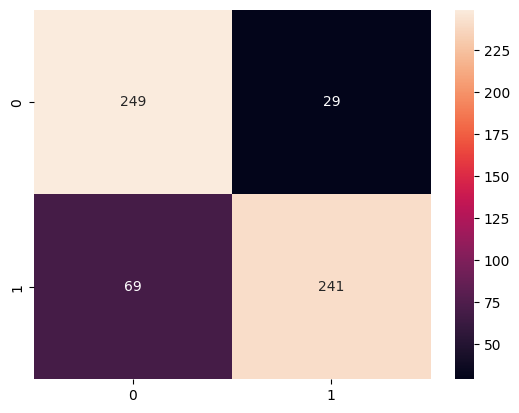

In [32]:
logit.perform_with_test()

In [33]:
knn = sklearn_model(estimator=KNeighborsClassifier(), param_grid=param_knn, x_train=x_train, y_train = y_train, x_test = x_test, y_test = y_test)
knn.perform_grid_search()

Best accuracy score with grid search: 86.4% 
 best parameters: {'n_neighbors': 16} 



Accuracy score with training data: 86.6% 
 classification report: 
               precision    recall  f1-score   support

           0       0.79      0.98      0.87       278
           1       0.98      0.76      0.86       310

    accuracy                           0.87       588
   macro avg       0.88      0.87      0.87       588
weighted avg       0.89      0.87      0.86       588
 
 Axes(0.125,0.11;0.62x0.77)


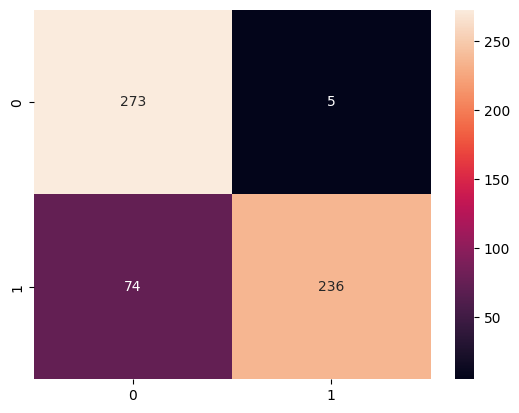

In [34]:
knn.perform_with_test()

In [35]:
svm = sklearn_model(estimator=SVC(), param_grid=param_svm, x_train=x_train, y_train = y_train, x_test = x_test, y_test = y_test)
svm.perform_grid_search()

Best accuracy score with grid search: 85.39999999999999% 
 best parameters: {'C': 50} 



Accuracy score with training data: 85.39999999999999% 
 classification report: 
               precision    recall  f1-score   support

           0       0.77      0.99      0.86       278
           1       0.98      0.74      0.84       310

    accuracy                           0.85       588
   macro avg       0.88      0.86      0.85       588
weighted avg       0.88      0.85      0.85       588
 
 Axes(0.125,0.11;0.62x0.77)


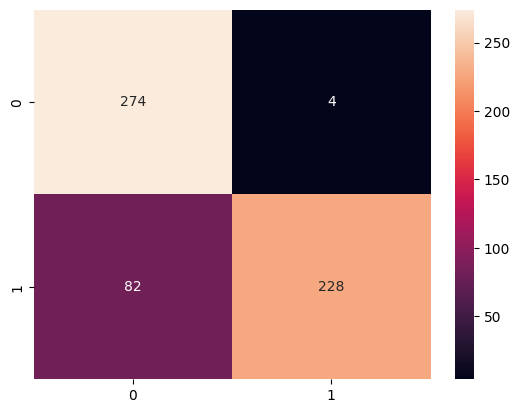

In [36]:
svm.perform_with_test()

In [37]:
rf = sklearn_model(estimator=XGBRFClassifier(), param_grid=param_rf, x_train=x_train, y_train = y_train, x_test = x_test, y_test = y_test)
rf.perform_grid_search()

Best accuracy score with grid search: 90.5% 
 best parameters: {'max_depth': 8, 'n_estimators': 300} 



Accuracy score with training data: 90.3% 
 classification report: 
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       278
           1       1.00      0.82      0.90       310

    accuracy                           0.90       588
   macro avg       0.91      0.91      0.90       588
weighted avg       0.92      0.90      0.90       588
 
 Axes(0.125,0.11;0.62x0.77)


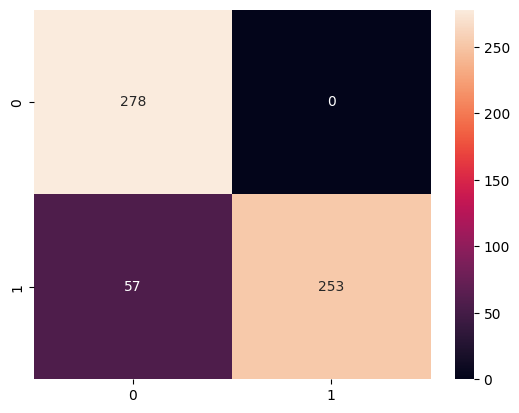

In [38]:
rf.perform_with_test()

In [39]:
xg = sklearn_model(estimator=XGBClassifier(), param_grid=param_xg, x_train=x_train, y_train = y_train, x_test = x_test, y_test = y_test)
xg.perform_grid_search()

Best accuracy score with grid search: 91.4% 
 best parameters: {'eta': 0.05, 'gamma': 0.3, 'max_depth': 5, 'min_child_weight': 1} 



Accuracy score with training data: 91.0% 
 classification report: 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       278
           1       1.00      0.83      0.91       310

    accuracy                           0.91       588
   macro avg       0.92      0.91      0.91       588
weighted avg       0.92      0.91      0.91       588
 
 Axes(0.125,0.11;0.62x0.77)


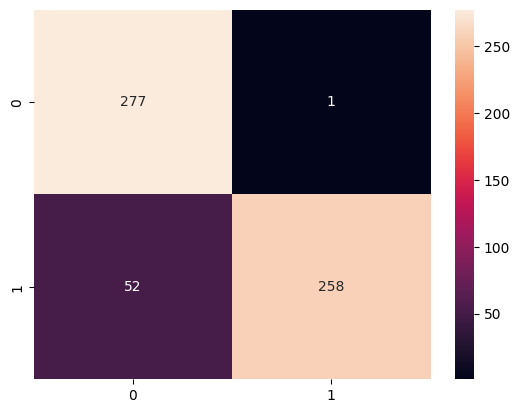

In [40]:
xg.perform_with_test()

In [41]:
input_1 = Input(shape = (x_train.shape[1],))
x = Dense(128, activation = 'relu')(input_1)
x = Dense(64, activation = 'relu')(x)
output_1 = Dense(1, activation = 'sigmoid')(x)

model_1 = Model(inputs = input_1, outputs = output_1)
model_1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense (Dense)               (None, 128)               3840      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 12161 (47.50 KB)
Trainable params: 12161 (47.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
model_1.fit(x_train, y_train, epochs =50, validation_data=(x_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', min_delta= 0.001, patience=20, mode='min')])

Epoch 1/50
43/43 [==============================] - 0s 3ms/step - loss: 0.6812 - accuracy: 0.6496 - val_loss: 0.4000 - val_accuracy: 0.8299
Epoch 2/50
43/43 [==============================] - 0s 1ms/step - loss: 0.3997 - accuracy: 0.8175 - val_loss: 0.3575 - val_accuracy: 0.8452
Epoch 3/50
43/43 [==============================] - 0s 1ms/step - loss: 0.3738 - accuracy: 0.8292 - val_loss: 0.3438 - val_accuracy: 0.8214
Epoch 4/50
43/43 [==============================] - 0s 935us/step - loss: 0.3661 - accuracy: 0.8277 - val_loss: 0.3477 - val_accuracy: 0.8418
Epoch 5/50
43/43 [==============================] - 0s 917us/step - loss: 0.3682 - accuracy: 0.8277 - val_loss: 0.3426 - val_accuracy: 0.8282
Epoch 6/50
43/43 [==============================] - 0s 1ms/step - loss: 0.3581 - accuracy: 0.8292 - val_loss: 0.3419 - val_accuracy: 0.8282
Epoch 7/50
43/43 [==============================] - 0s 1ms/step - loss: 0.3607 - accuracy: 0.8321 - val_loss: 0.3412 - val_accuracy: 0.8333
Epoch 8/50
43/43

19/19 [==============================] - 0s 111us/step
accuracy score: 85.0% 
 classification report: 
               precision    recall  f1-score   support

           0       0.80      0.92      0.85       278
           1       0.92      0.79      0.85       310

    accuracy                           0.85       588
   macro avg       0.86      0.85      0.85       588
weighted avg       0.86      0.85      0.85       588
 
 Axes(0.125,0.11;0.62x0.77)


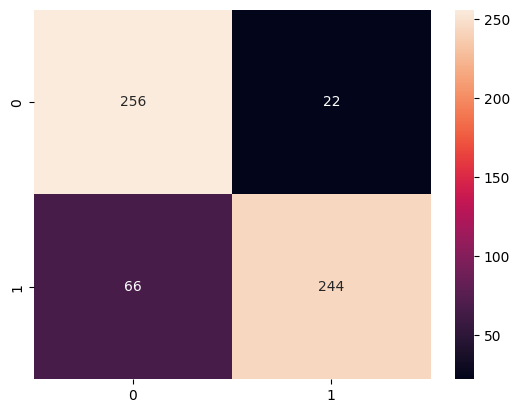

In [43]:
preds = model_1.predict(x_test) >=0.5

print('accuracy score: {}%'.format(round(accuracy_score(y_test, preds),3)*100), '\n', 'classification report:','\n', classification_report(y_test, preds), '\n', sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='.0f'))

In [44]:
input_2 = Input(shape = (x_train.shape[1],))
x = Dense(248, activation = 'relu')(input_2)
x = Dense(128, activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)
x = Dense(32, activation = 'relu')(x)
output_2 = Dense(1, activation = 'sigmoid')(x)

model_2 = Model(inputs = input_2, outputs = output_2)
model_2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense_3 (Dense)             (None, 248)               7440      
                                                                 
 dense_4 (Dense)             (None, 128)               31872     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 49681 (194.07 KB)
Trainable params: 49681 (19

In [45]:
model_2.fit(x_train, y_train, epochs =50, validation_data=(x_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=20, min_delta=0.001,mode='min')])

Epoch 1/50
43/43 [==============================] - 1s 3ms/step - loss: 0.5308 - accuracy: 0.6774 - val_loss: 0.3606 - val_accuracy: 0.8231
Epoch 2/50
43/43 [==============================] - 0s 1ms/step - loss: 0.3853 - accuracy: 0.8197 - val_loss: 0.3562 - val_accuracy: 0.8197
Epoch 3/50
43/43 [==============================] - 0s 1ms/step - loss: 0.3612 - accuracy: 0.8350 - val_loss: 0.3418 - val_accuracy: 0.8452
Epoch 4/50
43/43 [==============================] - 0s 2ms/step - loss: 0.3619 - accuracy: 0.8365 - val_loss: 0.3417 - val_accuracy: 0.8231
Epoch 5/50
43/43 [==============================] - 0s 1ms/step - loss: 0.3535 - accuracy: 0.8416 - val_loss: 0.3505 - val_accuracy: 0.8469
Epoch 6/50
43/43 [==============================] - 0s 1ms/step - loss: 0.3695 - accuracy: 0.8350 - val_loss: 0.3426 - val_accuracy: 0.8418
Epoch 7/50
43/43 [==============================] - 0s 1ms/step - loss: 0.3528 - accuracy: 0.8409 - val_loss: 0.3397 - val_accuracy: 0.8469
Epoch 8/50
43/43 [==

19/19 [==============================] - 0s 451us/step
accuracy score: 84.2% 
 classification report: 
               precision    recall  f1-score   support

           0       0.78      0.94      0.85       278
           1       0.93      0.76      0.83       310

    accuracy                           0.84       588
   macro avg       0.85      0.85      0.84       588
weighted avg       0.86      0.84      0.84       588
 
 Axes(0.125,0.11;0.62x0.77)


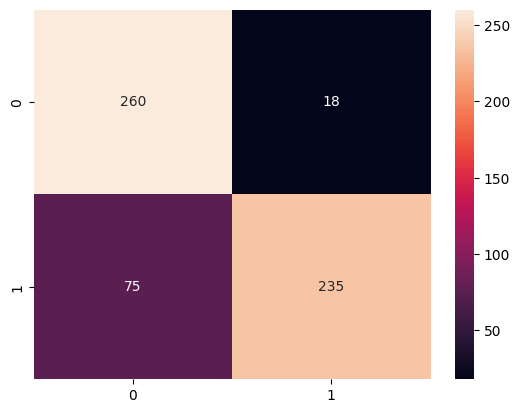

In [46]:
preds2 = model_2.predict(x_test) >=0.5

print('accuracy score: {}%'.format(round(accuracy_score(y_test, preds2),3)*100), '\n', 'classification report:','\n', classification_report(y_test, preds2), '\n', sns.heatmap(confusion_matrix(y_test, preds2), annot=True, fmt='.0f'))

In [47]:
input_3 = Input(shape = (x_train.shape[1],))
x = Dense(640, activation = 'relu')(input_3)
x = Dense(512, activation = 'relu')(x)
x = Dense(384, activation = 'relu')(x)
x = Dense(248, activation = 'relu')(x)
x = Dense(128,activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)
x = Dense(16, activation = 'relu')(x)
output_3 = Dense(1, activation = 'sigmoid')(x)

model_3 = Model(inputs = input_3, outputs = output_3)
model_3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense_8 (Dense)             (None, 640)               19200     
                                                                 
 dense_9 (Dense)             (None, 512)               328192    
                                                                 
 dense_10 (Dense)            (None, 384)               196992    
                                                                 
 dense_11 (Dense)            (None, 248)               95480     
                                                                 
 dense_12 (Dense)            (None, 128)               31872     
                                                                 
 dense_13 (Dense)            (None, 64)                8256

In [48]:
model_3.fit(x_train, y_train, epochs =50, validation_data=(x_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=20, min_delta=0.001,mode='min')])

Epoch 1/50
43/43 [==============================] - 1s 7ms/step - loss: 0.5934 - accuracy: 0.5985 - val_loss: 0.3575 - val_accuracy: 0.8452
Epoch 2/50
43/43 [==============================] - 0s 6ms/step - loss: 0.3875 - accuracy: 0.8219 - val_loss: 0.3553 - val_accuracy: 0.8401
Epoch 3/50
43/43 [==============================] - 0s 6ms/step - loss: 0.3650 - accuracy: 0.8401 - val_loss: 0.3749 - val_accuracy: 0.8367
Epoch 4/50
43/43 [==============================] - 0s 7ms/step - loss: 0.3912 - accuracy: 0.8234 - val_loss: 0.3614 - val_accuracy: 0.8469
Epoch 5/50
43/43 [==============================] - 0s 6ms/step - loss: 0.3700 - accuracy: 0.8431 - val_loss: 0.4201 - val_accuracy: 0.8316
Epoch 6/50
43/43 [==============================] - 0s 8ms/step - loss: 0.3722 - accuracy: 0.8336 - val_loss: 0.3406 - val_accuracy: 0.8486
Epoch 7/50
43/43 [==============================] - 0s 7ms/step - loss: 0.3411 - accuracy: 0.8562 - val_loss: 0.3348 - val_accuracy: 0.8418
Epoch 8/50
43/43 [==

19/19 [==============================] - 0s 846us/step
accuracy score: 84.5% 
 classification report: 
               precision    recall  f1-score   support

           0       0.77      0.95      0.85       278
           1       0.95      0.75      0.84       310

    accuracy                           0.85       588
   macro avg       0.86      0.85      0.84       588
weighted avg       0.86      0.85      0.84       588
 
 Axes(0.125,0.11;0.62x0.77)


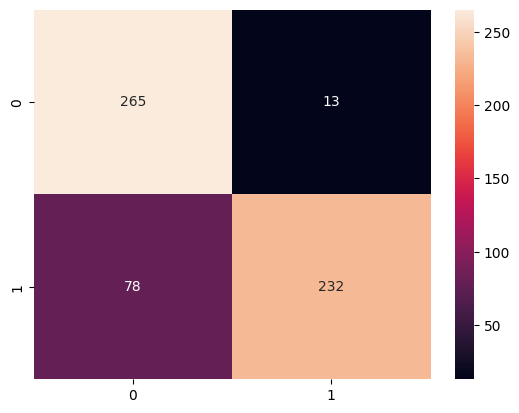

In [49]:
preds3 = model_3.predict(x_test) >=0.5

print('accuracy score: {}%'.format(round(accuracy_score(y_test, preds3),3)*100), '\n', 'classification report:','\n', classification_report(y_test, preds3), '\n', sns.heatmap(confusion_matrix(y_test, preds3), annot=True, fmt='.0f'))

In [50]:
input_4= Input(shape = (x_train.shape[1],))
x = Dense(640, activation = 'relu')(input_4)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.5)(x)
x = Dense(384, activation = 'relu')(x)
x = Dense(248, activation = 'relu')(x)
x = Dropout(0.3)(x)
x = Dense(128,activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(16, activation = 'relu')(x)
output_4 = Dense(1, activation = 'sigmoid')(x)

model_4= Model(inputs = input_4, outputs = output_4)
model_4.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_4.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense_16 (Dense)            (None, 640)               19200     
                                                                 
 dense_17 (Dense)            (None, 512)               328192    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_18 (Dense)            (None, 384)               196992    
                                                                 
 dense_19 (Dense)            (None, 248)               95480     
                                                                 
 dropout_1 (Dropout)         (None, 248)               0   

In [51]:
model_4.fit(x_train, y_train, epochs =50, validation_data=(x_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=20, min_delta=0.001,mode='min')])

Epoch 1/50
43/43 [==============================] - 1s 8ms/step - loss: 0.6893 - accuracy: 0.5095 - val_loss: 0.5897 - val_accuracy: 0.5391
Epoch 2/50
43/43 [==============================] - 0s 7ms/step - loss: 0.5800 - accuracy: 0.6204 - val_loss: 0.4360 - val_accuracy: 0.8180
Epoch 3/50
43/43 [==============================] - 0s 7ms/step - loss: 0.4367 - accuracy: 0.8146 - val_loss: 0.3534 - val_accuracy: 0.8401
Epoch 4/50
43/43 [==============================] - 0s 7ms/step - loss: 0.3841 - accuracy: 0.8336 - val_loss: 0.3400 - val_accuracy: 0.8435
Epoch 5/50
43/43 [==============================] - 0s 6ms/step - loss: 0.3770 - accuracy: 0.8401 - val_loss: 0.3448 - val_accuracy: 0.8350
Epoch 6/50
43/43 [==============================] - 0s 8ms/step - loss: 0.3636 - accuracy: 0.8387 - val_loss: 0.3312 - val_accuracy: 0.8452
Epoch 7/50
43/43 [==============================] - 0s 10ms/step - loss: 0.3685 - accuracy: 0.8387 - val_loss: 0.3353 - val_accuracy: 0.8435
Epoch 8/50
43/43 [=

19/19 [==============================] - 0s 2ms/step
accuracy score: 84.89999999999999% 
 classification report: 
               precision    recall  f1-score   support

           0       0.76      0.99      0.86       278
           1       0.99      0.72      0.83       310

    accuracy                           0.85       588
   macro avg       0.87      0.86      0.85       588
weighted avg       0.88      0.85      0.85       588
 
 Axes(0.125,0.11;0.62x0.77)


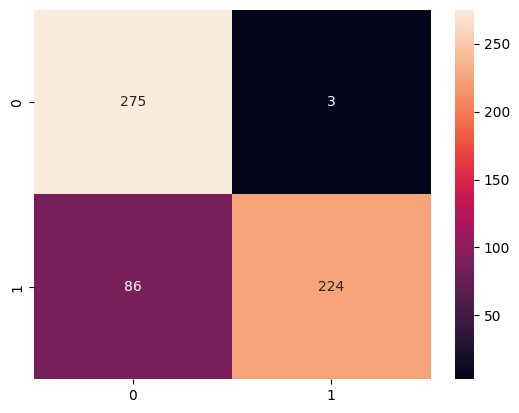

In [52]:
preds4 = model_4.predict(x_test) >=0.5

print('accuracy score: {}%'.format(round(accuracy_score(y_test, preds4),3)*100), '\n', 'classification report:','\n', classification_report(y_test, preds4), '\n', sns.heatmap(confusion_matrix(y_test, preds4), annot=True, fmt='.0f'))

In [53]:
input_5= Input(shape = (x_train.shape[1],))
x = Dense(1024, activation = 'relu')(input_5)
x = Dense(896, activation = 'relu')(x)
x = Dropout(0.5)(x)
x = Dense(768, activation = 'relu')(x)
x = Dense(640, activation = 'relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation = 'relu')(x)
x = Dense(384, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(248, activation = 'relu')(x)
x = Dense(128,activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(64, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(16, activation = 'relu')(x)
output_5 = Dense(1, activation = 'sigmoid')(x)

model_5= Model(inputs = input_5, outputs = output_5)
model_5.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_5.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense_24 (Dense)            (None, 1024)              30720     
                                                                 
 dense_25 (Dense)            (None, 896)               918400    
                                                                 
 dropout_3 (Dropout)         (None, 896)               0         
                                                                 
 dense_26 (Dense)            (None, 768)               688896    
                                                                 
 dense_27 (Dense)            (None, 640)               492160    
                                                                 
 dropout_4 (Dropout)         (None, 640)               0   

In [54]:
model_5.fit(x_train, y_train, epochs =50, validation_data=(x_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=20, min_delta=0.001,mode='min')])

Epoch 1/50
43/43 [==============================] - 2s 24ms/step - loss: 0.6593 - accuracy: 0.5051 - val_loss: 0.6033 - val_accuracy: 0.7857
Epoch 2/50
43/43 [==============================] - 1s 29ms/step - loss: 0.5116 - accuracy: 0.7423 - val_loss: 0.3924 - val_accuracy: 0.8503
Epoch 3/50
43/43 [==============================] - 1s 27ms/step - loss: 0.4071 - accuracy: 0.8248 - val_loss: 0.3408 - val_accuracy: 0.8180
Epoch 4/50
43/43 [==============================] - 1s 31ms/step - loss: 0.3771 - accuracy: 0.8358 - val_loss: 0.3313 - val_accuracy: 0.8486
Epoch 5/50
43/43 [==============================] - 1s 26ms/step - loss: 0.3557 - accuracy: 0.8482 - val_loss: 0.3338 - val_accuracy: 0.8452
Epoch 6/50
43/43 [==============================] - 1s 26ms/step - loss: 0.3610 - accuracy: 0.8496 - val_loss: 0.3438 - val_accuracy: 0.8469
Epoch 7/50
43/43 [==============================] - 1s 25ms/step - loss: 0.3696 - accuracy: 0.8380 - val_loss: 0.3261 - val_accuracy: 0.8537
Epoch 8/50
43

19/19 [==============================] - 0s 3ms/step
accuracy score: 84.2% 
 classification report: 
               precision    recall  f1-score   support

           0       0.76      0.97      0.85       278
           1       0.96      0.73      0.83       310

    accuracy                           0.84       588
   macro avg       0.86      0.85      0.84       588
weighted avg       0.87      0.84      0.84       588
 
 Axes(0.125,0.11;0.62x0.77)


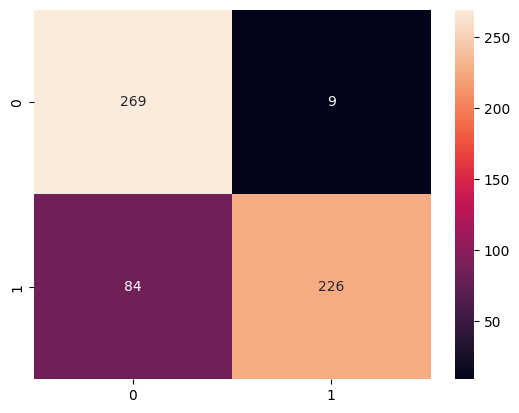

In [55]:
preds5 = model_5.predict(x_test) >=0.5

print('accuracy score: {}%'.format(round(accuracy_score(y_test, preds5),3)*100), '\n', 'classification report:','\n', classification_report(y_test, preds5), '\n', sns.heatmap(confusion_matrix(y_test, preds5), annot=True, fmt='.0f'))

In [56]:
input_6= Input(shape = (x_train.shape[1],))
x = Dense(1024, activation = 'relu')(input_6)
x = Dense(896, activation = 'relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(768, activation = 'relu')(x)
x = Dense(640, activation = 'relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(512, activation = 'relu')(x)
x = Dense(384, activation = 'relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(248, activation = 'relu')(x)
x = Dense(128,activation = 'relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(64, activation = 'relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(16, activation = 'relu')(x)
output_6 = Dense(1, activation = 'sigmoid')(x)

model_6= Model(inputs = input_6, outputs = output_6)
model_6.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_6.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense_35 (Dense)            (None, 1024)              30720     
                                                                 
 dense_36 (Dense)            (None, 896)               918400    
                                                                 
 batch_normalization (Batch  (None, 896)               3584      
 Normalization)                                                  
                                                                 
 dropout_8 (Dropout)         (None, 896)               0         
                                                                 
 dense_37 (Dense)            (None, 768)               688896    
                                                           

In [57]:
model_6.fit(x_train, y_train, epochs =50, validation_data=(x_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=20, min_delta=0.001,mode='min')])

Epoch 1/50
43/43 [==============================] - 3s 27ms/step - loss: 0.4938 - accuracy: 0.7416 - val_loss: 5.2076 - val_accuracy: 0.5272
Epoch 2/50
43/43 [==============================] - 1s 26ms/step - loss: 0.4105 - accuracy: 0.8168 - val_loss: 1.0619 - val_accuracy: 0.7874
Epoch 3/50
43/43 [==============================] - 1s 24ms/step - loss: 0.3814 - accuracy: 0.8314 - val_loss: 0.7386 - val_accuracy: 0.7823
Epoch 4/50
43/43 [==============================] - 1s 24ms/step - loss: 0.3841 - accuracy: 0.8328 - val_loss: 0.3567 - val_accuracy: 0.8061
Epoch 5/50
43/43 [==============================] - 1s 25ms/step - loss: 0.4049 - accuracy: 0.8219 - val_loss: 0.3185 - val_accuracy: 0.8044
Epoch 6/50
43/43 [==============================] - 1s 26ms/step - loss: 0.3789 - accuracy: 0.8285 - val_loss: 0.3234 - val_accuracy: 0.8027
Epoch 7/50
43/43 [==============================] - 1s 24ms/step - loss: 0.3783 - accuracy: 0.8307 - val_loss: 0.3310 - val_accuracy: 0.8078
Epoch 8/50
43

19/19 [==============================] - 0s 3ms/step
accuracy score: 84.2% 
 classification report: 
               precision    recall  f1-score   support

           0       0.75      1.00      0.86       278
           1       1.00      0.70      0.82       310

    accuracy                           0.84       588
   macro avg       0.87      0.85      0.84       588
weighted avg       0.88      0.84      0.84       588
 
 Axes(0.125,0.11;0.62x0.77)


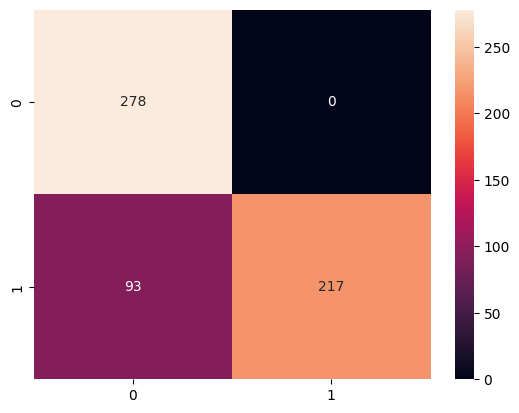

In [58]:
preds6 = model_6.predict(x_test) >=0.7

print('accuracy score: {}%'.format(round(accuracy_score(y_test, preds6),3)*100), '\n', 'classification report:','\n', classification_report(y_test, preds6), '\n', sns.heatmap(confusion_matrix(y_test, preds6), annot=True, fmt='.0f'))

In [59]:
from tensorflow.keras.layers import Add
input_7= Input(shape = (x_train.shape[1],))
x = Dense(1024, activation = 'relu')(input_7)
x = Dense(896, activation = 'relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(768, activation = 'relu')(x)
skip_1 = Add()([x,x])
x = Dense(640, activation = 'relu')(skip_1)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(512, activation = 'relu')(x)
skip_2 = Add()([x,x])
x = Dense(384, activation = 'relu')(skip_2)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(248, activation = 'relu')(x)
skip_3 = Add()([x,x])
x = Dense(128,activation = 'relu')(skip_3)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(64, activation = 'relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(16, activation = 'relu')(x)
output_7 = Dense(1, activation = 'sigmoid')(x)

model_7= Model(inputs = input_6, outputs = output_6)
model_7.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_7.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense_35 (Dense)            (None, 1024)              30720     
                                                                 
 dense_36 (Dense)            (None, 896)               918400    
                                                                 
 batch_normalization (Batch  (None, 896)               3584      
 Normalization)                                                  
                                                                 
 dropout_8 (Dropout)         (None, 896)               0         
                                                                 
 dense_37 (Dense)            (None, 768)               688896    
                                                           

In [60]:
model_7.fit(x_train, y_train, epochs =50, validation_data=(x_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=20, min_delta=0.001,mode='min')])

Epoch 1/50
43/43 [==============================] - 3s 28ms/step - loss: 0.3735 - accuracy: 0.8299 - val_loss: 0.4261 - val_accuracy: 0.8214
Epoch 2/50
43/43 [==============================] - 1s 25ms/step - loss: 0.3813 - accuracy: 0.8358 - val_loss: 0.4964 - val_accuracy: 0.8231
Epoch 3/50
43/43 [==============================] - 1s 25ms/step - loss: 0.3691 - accuracy: 0.8431 - val_loss: 0.5115 - val_accuracy: 0.8163
Epoch 4/50
43/43 [==============================] - 1s 24ms/step - loss: 0.3740 - accuracy: 0.8380 - val_loss: 0.3802 - val_accuracy: 0.8214
Epoch 5/50
43/43 [==============================] - 1s 29ms/step - loss: 0.3713 - accuracy: 0.8380 - val_loss: 0.3493 - val_accuracy: 0.8350
Epoch 6/50
43/43 [==============================] - 1s 26ms/step - loss: 0.3832 - accuracy: 0.8241 - val_loss: 0.3597 - val_accuracy: 0.8180
Epoch 7/50
43/43 [==============================] - 1s 26ms/step - loss: 0.4018 - accuracy: 0.8277 - val_loss: 0.3835 - val_accuracy: 0.8265
Epoch 8/50
43

19/19 [==============================] - 0s 3ms/step
accuracy score: 85.0% 
 classification report: 
               precision    recall  f1-score   support

           0       0.76      0.99      0.86       278
           1       0.99      0.73      0.84       310

    accuracy                           0.85       588
   macro avg       0.88      0.86      0.85       588
weighted avg       0.88      0.85      0.85       588
 
 Axes(0.125,0.11;0.62x0.77)


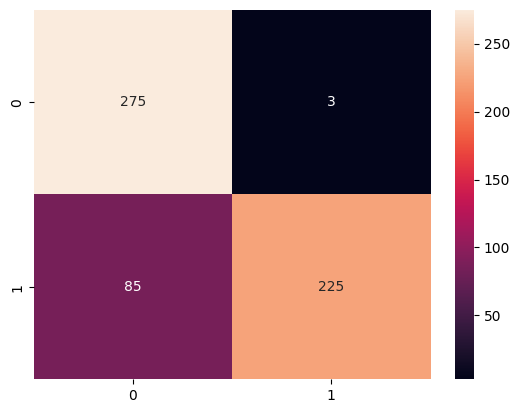

In [61]:
preds7 = model_7.predict(x_test) >=0.7

print('accuracy score: {}%'.format(round(accuracy_score(y_test, preds7),3)*100), '\n', 'classification report:','\n', classification_report(y_test, preds7), '\n', sns.heatmap(confusion_matrix(y_test, preds7), annot=True, fmt='.0f'))